Створено плакат: D:\Навчання\ХПІ\Pyton\L4\poster.png
Розмір: 1500x1000
Стовпців: 3, Рядків: 2


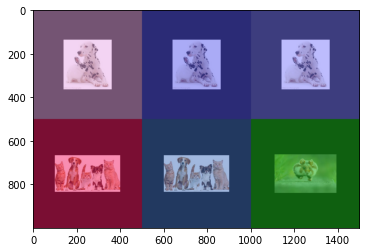

In [1]:
from PIL import Image as PILImage
import os
import random
import matplotlib.pyplot as plt

def resize_and_crop(image_path, target_size):
    # Відкриваємо зображення
    img = PILImage.open(image_path)
    
    # Обчислюємо обрізку по центру
    width, height = img.size
    new_width, new_height = target_size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2

    # Обрізаємо та змінюємо розмір
    img = img.crop((left, top, right, bottom))
    img = img.resize(target_size, PILImage.ANTIALIAS)

    return img

def apply_random_filter(image, filter_color):
    # Застосовуємо випадковий кольоровий фільтр
    filter_img = PILImage.new('RGB', image.size, filter_color)
    return PILImage.blend(image, filter_img, 0.5)

def create_poster(image_folder, output_path, columns, rows, output_size=(500, 500)):
    # Отримуємо список файлів зображень в папці
    image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # Створюємо порожній полотно для плаката
    poster_width = columns * output_size[0]
    poster_height = rows * output_size[1]
    poster = PILImage.new('RGB', (poster_width, poster_height))

    # Ітеруємося по рядках та стовпцях
    for i in range(rows):
        for j in range(columns):
            # Випадково обираємо зображення та колір фільтра
            selected_image = random.choice(image_files)
            filter_color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
            
            # Відкриваємо зображення, змінюємо розмір та обрізаємо
            img_path = os.path.join(image_folder, selected_image)
            img = resize_and_crop(img_path, output_size)

            # Застосовуємо випадковий фільтр
            img = apply_random_filter(img, filter_color)

            # Вставляємо зображення на плакат
            poster.paste(img, (j * output_size[0], i * output_size[1]))

    # Зберігаємо плакат за вказаним шляхом
    poster.save(output_path)

    # Виводимо інформацію про плакат
    print(f"Створено плакат: {output_path}")
    print(f"Розмір: {poster_width}x{poster_height}")
    print(f"Стовпців: {columns}, Рядків: {rows}")

    # Показуємо плакат
    plt.imshow(poster)
    plt.show()

# Приклад використання
image_folder = 'D:\Навчання\ХПІ\Pyton\L4'
output_path = 'D:\Навчання\ХПІ\Pyton\L4\poster.png'
create_poster(image_folder, output_path, columns=3, rows=2)
